In [13]:
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt

In [90]:
class ChemViz: 
    
    """
    This will allow users to visualize species’ reaction rates or concentrations over time.
    
    Input: 
    - file is a string or a list of strings corresponding the the csv or HDF5 file(s) 
        containing the simulation data to be plotted ChemSolver.solve.
    - species is a list of species to be plotted
    - LowT specifies the start time for the time series to be plotted 
        (which can be a subset of the simulation run).
    - HighT specifies the end time for the time series to be plotted 
        (which can be a subset of the simulation run). 
    - yaxis is the quantity to be plotted: reaction rate or concentration

    """
        
    def __init__(self):
        
        self.file = None
        self.species = None
        ## species will be a list
        self.T = None
        ## will also be a list/range
        self.simulation_file = None
        self.yaxis= None
        
    
    def readinfile(self, file):

        filename = str(file)
        last_3_letters = filename.strip()[-3:]
        if last_3_letters == 'csv': 
            self.df = pd.read_csv(str(file))
        elif last_3_letters == 'df5': 
            self.df =  pd.HDFStore(str(file))
        elif last_3_letters == '.h5': 
            self.df = pd.HDFStore(str(file))
        else: 
            raise ValueError("file must be CSV or H5/HDF5")
    
        
    def filterByTemperature(self, LowT, HighT):
        return self.df[(self.df['t']<=HighT) & (self.df['t']>=LowT)]

        
    def plot_time_series(self, file, species, LowT, HighT, yaxis, outputfile=None):
        
        #read in file
        self.readinfile(str(file))
        
        ## Concentration or reaction rate
        if type(yaxis) != str:
            raise TypeError("yaxis must be string")
        ## Concentration 
        lowyaxis = yaxis.lower()
        if lowyaxis == "concentration": 
            concentration_cols = [col for col in self.df.columns if 'Concentration' in col] + ['t']
            self.df = self.df[concentration_cols]
        ## reaction rate
        lowyaxis = yaxis.lower()
        if lowyaxis == "reactionrate": 
            rxn_cols = [col for col in self.df.columns if 'Reaction_rate' in col] + ['t']
            self.df = self.df[rxn_cols]
        
    
        #specify for what temp
        self.df = self.filterByTemperature(LowT, HighT)
        
        #rename the columns of the df
        columns = (self.df.columns)
        for i,v in enumerate(columns):
            
            column_new_name = (columns[i].split('-')[0])
            self.df = self.df.rename(columns={str(v): str(column_new_name)})
        print(self.df.columns)
            
        #Specify which species
        listofsp = list(species)
        self.dfofsp = self.df[listofsp]

        
        #plot
        ### what to do with this below
        %matplotlib inline
        plt.figure(figsize = (10,5))
        ###?????? NEED TO WORK ON COLORZ
        list_of_colors = ((33, 55, 66,))
        
        title = "plot of " + str(species)

        plt.title(str((title)))  
        
        for i,v in enumerate(species):
            plt.plot(self.df['t'],self.dfofsp[str(v)])
            
        plt.legend()


Index(['H', 'O', 'OH', 'H2', 'H2O', 'O2', 't'], dtype='object')


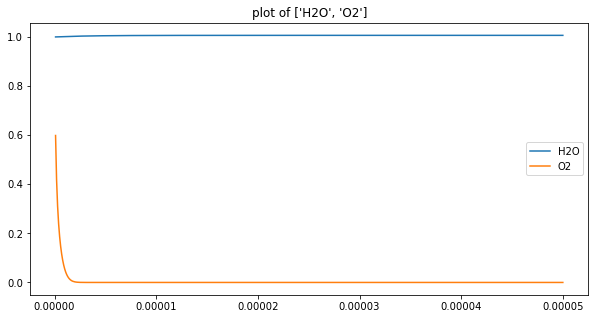

In [87]:
cs= ChemViz() 
#cs.readinfile("DEMO_file_name.csv")

cs.plot_time_series( "DEMO_file_name.csv", ['H2O', 'O2'], .00000007, .0006, "concentration")



Index(['H', 'O', 'OH', 'H2', 'H2O', 'O2', 't'], dtype='object')


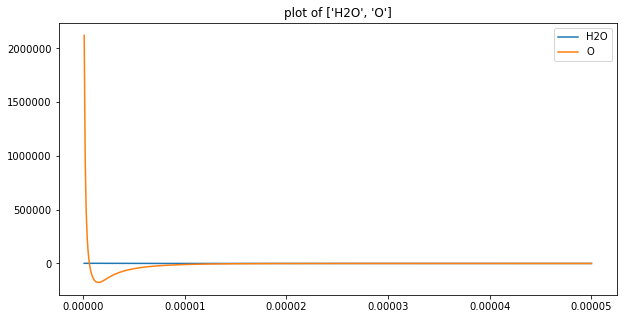

In [88]:

cs.plot_time_series( "DEMO_file_name.csv", ['H2O', 'O'], .00000007, .0006, "reactionrate")


In [174]:
title = "plot of " + str(sp)
print(title)

plot of ['H2O-Concentration', 'O2-Concentration', 'H-Reaction_rate', 'O-Reaction_rate']


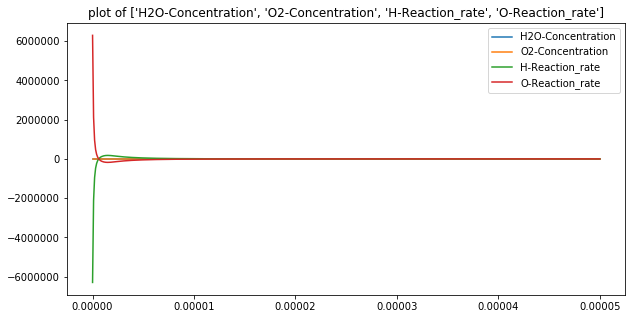

In [175]:
species = sp
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,5))

for i,v in enumerate(sp):
    plt.plot(df['t'],df[str(v)])
title = "plot of " + str(sp)

plt.title(str((title)))           
plt.legend()
#df.tail(20)


In [76]:
def filterByTemperature(lowTemp, highTemp):
    return df[(df['t']<=highTemp) & (df['t']>=lowTemp)]
newdf = filterByTemperature(.0000007,.0000009)
newdf

,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,T
7,7.000000e-07,0.367302,1.633774,2.133818,0.748365,1.001076,0.115666,52263.883280,-50667.009401,606401.827588,-330929.729313,1596.873879,-278665.846033,1000.0
8,8.000000e-07,0.374650,1.626584,2.190775,0.716053,1.001234,0.090703,92398.805601,-90830.093378,535055.019945,-315295.624996,1568.712223,-222896.819395,1000.0


In [66]:
import pandas as pd
#chem = ChemViz()
file = ("DEMO_file_name.csv")
df = pd.read_csv(str(file))
df
#df[:2]
T=[.000000001, .0000006]
columnlen = len(df.t)
for i,v in enumerate(df.t):
    if 
#df.t[2]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [37]:
chem.readinfile


<bound method ChemViz.readinfile of <__main__.ChemViz object at 0x10cf38128>>

In [1]:
### import matplotlib.pyplot as plt

class ChemViz: 
        
    def __init__(self, chem):
        
        self.chem = chem
        self.file = None
        self.species = None
        ## species will be a list
        self.T = None
        ## will also be a list/range
        self.simulation_file = None
        self.yaxis= None
        ## I dont remember what the sim file is for? remind me?

## so the chemviz will solve within this package, rather than reading in from the solver
## BEcause people can specify a diff range here then they did above

    
    
    def plot_time_series(self, file, species, T, yaxis, outputfile=None):
        
    def readinfile(self):
            filename = str(file)
            last_3_letters = filename.strip()[-3:]
            if last_3_letters == 'csv': 
                df = pd.read_csv(str(file))
            if last_3_letters == 'df5': 
                df = store = pd.HDFStore(str(file))
            if last_3_letters == '.h5': 
                df = store = pd.HDFStore(str(file))
            else: 
                raise ValueError("file must be CSV or H5/HDF5")
                ##???????????? why isn't valueerror changing color?
                
                
        
        self.yaxis = 
        ### yaxis type = reaction rate or concentration
        
        ##this would use the time range from the file
        if self.T > chemkin.T[-1]:
            ## ??????????? how to get the highest temp calculated?
            raise ValueError("Temperature out of range")
        if self.T < chemkin.T[0]:
            ## ??????????? how to get the lowest temp calculated?
            raise ValueError("Temperature out of range") 
        
        ## First read in file , csv or HDf5
        
        ## then specify only the species 
        
        ## Then specify the time range
            ## then just throw an error
        
        ## 
        
        ### to help make colors that can be seen
        def getcolors():
            N = len(self.species)
            ## make function to return a unique RGB (0-1)
            
            ## ??????????? list of colors.. need to change the touple values rn, theyre all the same. 
            colors = list(product(np.arange(0.0, 1.0, 0.4), repeat=N))
            
            
        for i,v in enumerate(len(self.species)):
            plt.plot("""SOMETHING..how to get from CSV or HDf5""", color = colors[i])
            
            
            
            
            
        ## R, G, B values
        #???????????????????? how to make output file have .png in string format
        plt.savefig('ChemVizplot.png')
        
        
"""%matplotlib inline
plt.figure(figsize = (10,5))
plt.plot(df['t'],df['H2-Concentration'])
plt.plot(df['t'],df['H2O-Concentration'])
plt.plot(df['t'],df['O-Concentration'], color = (33, 55, 66,))
plt.plot(df['t'],df['H-Concentration'])
plt.plot(df['t'],df['OH-Concentration'])
plt.plot(df['t'],df['O2-Concentration'])
plt.legend()
df.tail(20)"""
### How to make 
    

IndentationError: expected an indented block (<ipython-input-1-77b8ca11004a>, line 32)